# Знакомство с данными

## MNIST Digits

Воспользуйтесь данными с https://www.kaggle.com/c/digit-recognizer/data 
Далее предполагается, что файлы test.csv и train.csv расположены в одной директории с notebook-ом.

In [23]:
import numpy as np
import csv
import pylab as plt
%matplotlib inline


In [24]:
# Загрузите обучающую выборку (признаки и метки классов)

ifile = open("train.csv", "r")

train_data = []
train_values = []

read = csv.reader(ifile)
next(read)
for row in read:
    num = []
    for i in row[1:]:
        num.append(int(i))
    train_data.append(num)
    for i in row[0]:
        train_values.append(int(i))
ifile.close()


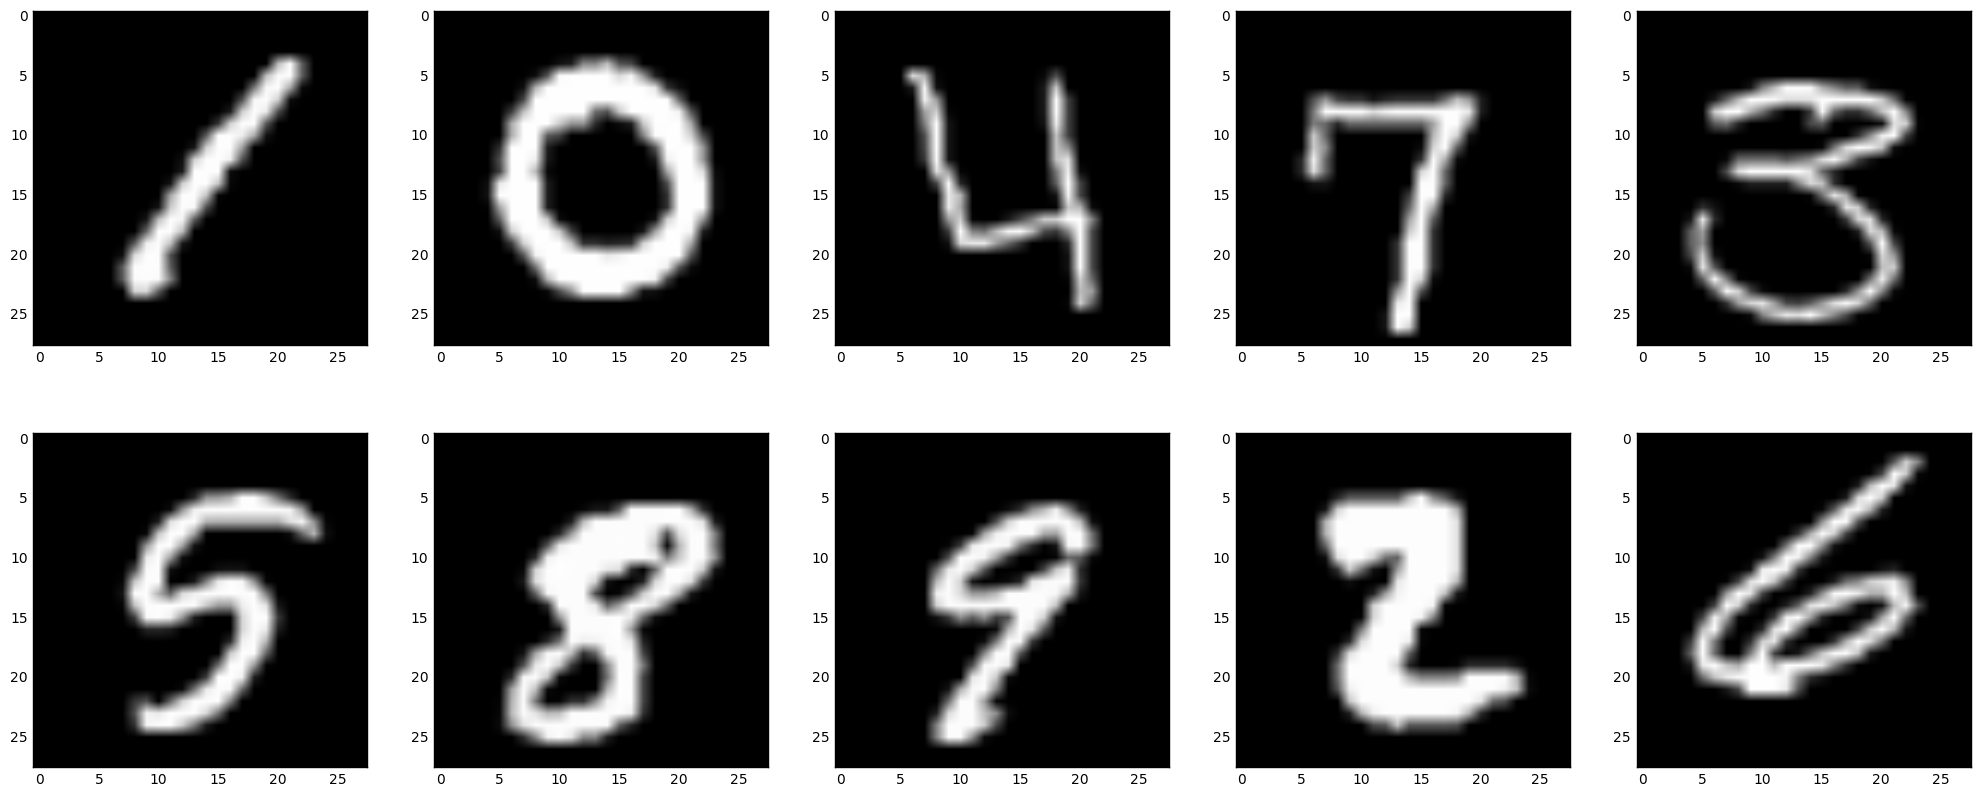

In [4]:
# нарисуйте по одной картинке каждой из 10 цифр (любые)
numbers = set()
numbers_id = []

for i in range(10):
    j = 0
    correct = False
    while correct != True:
        cur = train_values[j]
        if cur in numbers:
            j += 1
        else: 
            correct = True
            numbers.add(cur)
            numbers_id.append(j)

plt.figure(figsize=(25, 10))
for i in range(10):
    data = np.reshape(train_data[numbers_id[i]], (28, 28))
    plt.subplot(2, 5, i + 1)
    plt.imshow(data, cmap="gray")
    

In [ ]:
# опишите, сколько признаков в выборке, сколько объектов. Каких типов признкаки и объекты?


Объект - пара, состоящая из признаков и метки. 

Метки - цифры от 0 до 9.

Признаки - пиксели, которые несут в себе информацию об интенсивности цвета.(в нашем случае оттенок серого).Матрицы, состоящие из цифр от 0 до 255.

Найдем количество признаков и объектов. 

In [20]:
print("Количество меток:\n", len(train_values))
print("Количество признаков:\n", len(train_data[0]))


Количество меток:
 42000
Количество признаков:
 784


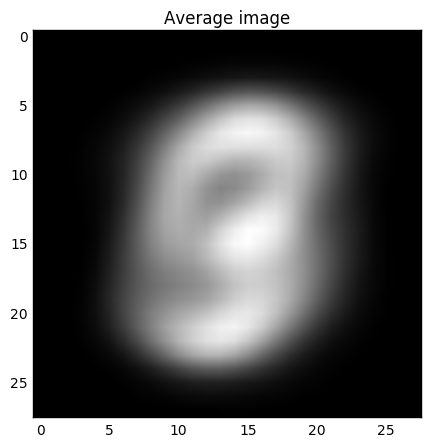

In [7]:
# нарисуйте среднее изображение, нарисуйте среднее изображение для каждой из цифр
# Прокомментируйте

averege = [np.zeros((28, 28)) for i in range(10)]
averege_am = [0 for i in range(10)]
for_all = np.zeros((28, 28))
all_am = 0

for k in range(len(train_values)):
    for_all += np.reshape(train_data[k], (28, 28))
    all_am += 1
    averege[train_values[k]] += np.reshape(train_data[k], (28, 28))
    averege_am[train_values[k]] += 1

plt.figure(figsize=(5, 5))
for_all /= all_am
plt.title("Average image")
plt.imshow(for_all, cmap="gray")


Полученное изображение очень размыто, что и ожидалось получить. Отдаленно изображение похоже на цифру 3 и это объясняется тем, что из 10 цифр 7 (2,3,5,6,8,9,0) имеют общие сгибы. Например верхняя часть цифры 2 схожа с верхом 3-ки, 8-ки, 9-ки и 0 и т.п. А сгибы тройки похожи на сгибы всех остальных цифр.

Среднее изображение по каждой из цифр: 


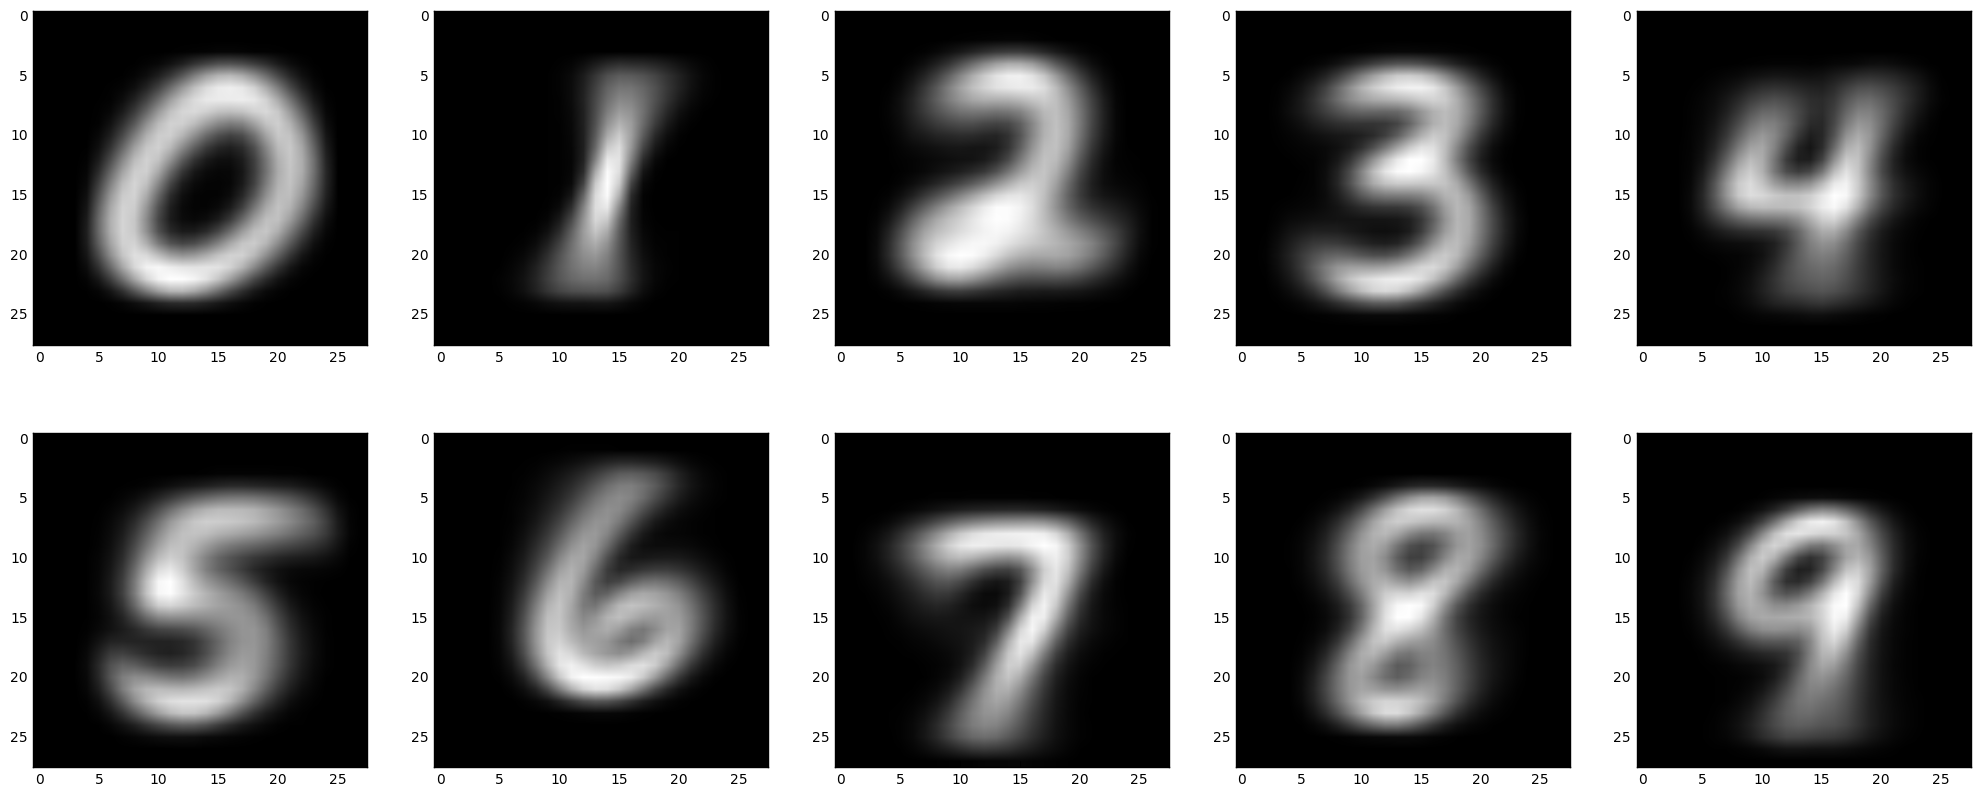

In [8]:
print("Среднее изображение по каждой из цифр: ")
plt.figure(figsize=(25, 10))
for i in range(10):
    averege[i] /= averege_am[i]
    plt.subplot(2, 5, i + 1)
    plt.imshow(averege[i], cmap="gray")
    

Снова получились размытые изображения, но очертания уже похожи на сами цифры.

In [ ]:
# нарисуйте 3 самых близких с среднему изображинию и 3 самых далеких от среднего изображений
# Прокомментируйте


Расстояние между изображениями будем считать как расстояние между соответсвтующими векторами, полученными из матриц признаков этих изображений.

In [9]:
def find_dist(a, b):
    x = a - b
    res = 0
    for i in x:
        res += i**2
    return res


In [10]:
def find_imgs(averege, number):
    farthest_id = [0 for i in range(3)]
    nearest_id = [0 for i in range(3)]

    farthest_am = [0 for i in range(3)]
    nearest_am = [10**9 for i in range(3)]
    
    cur = averege.ravel()
    
    for i in range(len(train_data)):
        if number == -1 or number == train_values[i] :
            dist = find_dist(cur, train_data[i])

            if dist > farthest_am[0]:
                if dist > farthest_am[1]:
                    if dist > farthest_am[2]:
                        farthest_am[0] = farthest_am[1]
                        farthest_id[0] = farthest_id[1]
                        farthest_am[1] = farthest_am[2]
                        farthest_id[1] = farthest_id[2]
                        farthest_am[2] = dist
                        farthest_id[2] = i
                    else:
                        farthest_am[0] = farthest_am[1]
                        farthest_id[0] = farthest_id[1]
                        farthest_am[1] = dist
                        farthest_id[1] = i
                else:
                    farthest_am[0] = dist
                    farthest_id[0] = i

            if dist < nearest_am[0]:
                if dist < nearest_am[1]:
                    if dist < nearest_am[2]:
                        nearest_am[0] = nearest_am[1]
                        nearest_id[0] = nearest_id[1]
                        nearest_am[1] = nearest_am[2]
                        nearest_id[1] = nearest_id[2]
                        nearest_am[2] = dist
                        nearest_id[2] = i
                    else:
                        nearest_am[0] = nearest_am[1]
                        nearest_id[0] = nearest_id[1]
                        nearest_am[1] = dist
                        nearest_id[1] = i
                else:
                    nearest_am[0] = dist
                    nearest_id[0] = i
    return farthest_id, nearest_id


Ф-ия find_dist() находит квадрат евклидова расстояния между векторами, а ф-ия find_imgs() находит индексы 3-ех самых далеких и 3-ех самых близких изображений относительно среднего среди всех train_data. (в train_data лежат все признаки соответ. меток)

In [11]:
far, near = find_imgs(for_all, -1)


Самые далекие от среднего: 


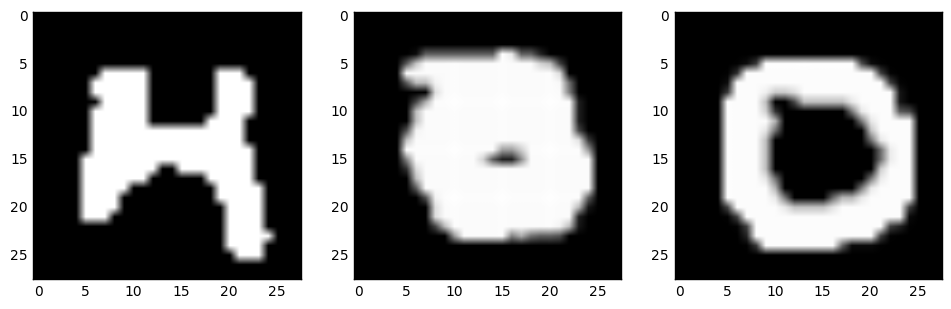

In [12]:
print("Самые далекие от среднего: ")
plt.figure(figsize=(20, 10))
for i in range(3):
    plt.subplot(2, 5, i + 1)
    res = np.reshape(train_data[far[i]], (28, 28))
    plt.imshow(res, cmap="gray")
    

Самые близкие к среднему: 


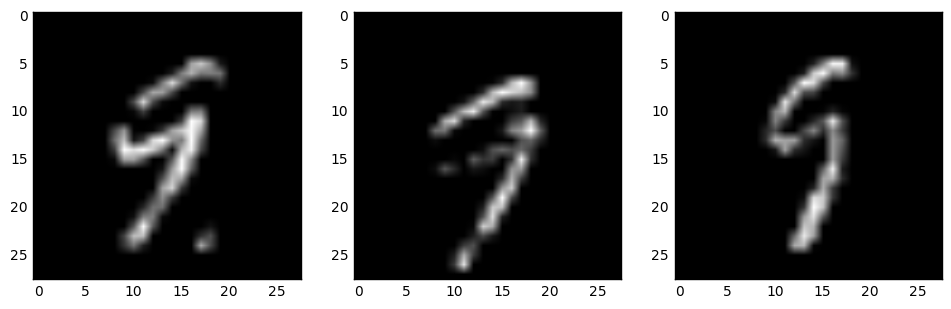

In [13]:
print("Самые близкие к среднему: ")
plt.figure(figsize=(20, 10))
for i in range(3):
    plt.subplot(2, 5, i + 1)
    res = np.reshape(train_data[near[i]], (28, 28))
    plt.imshow(res, cmap="gray")
    

Для каждой цифры имеем: 


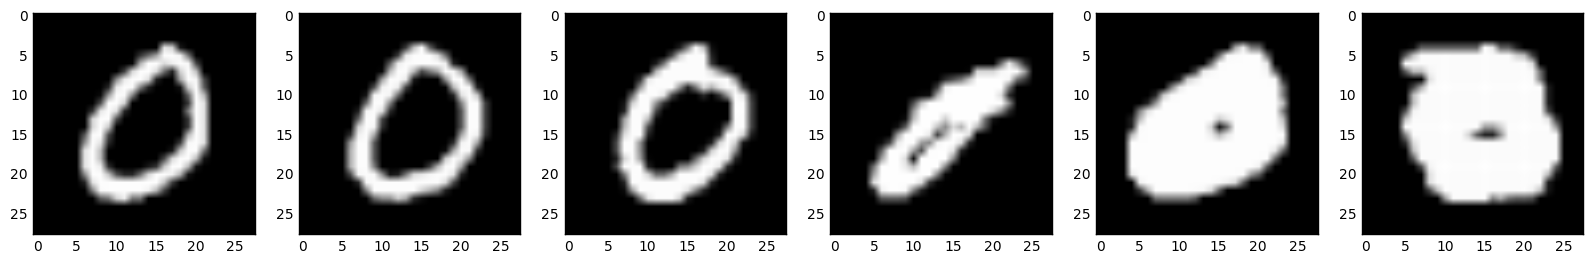

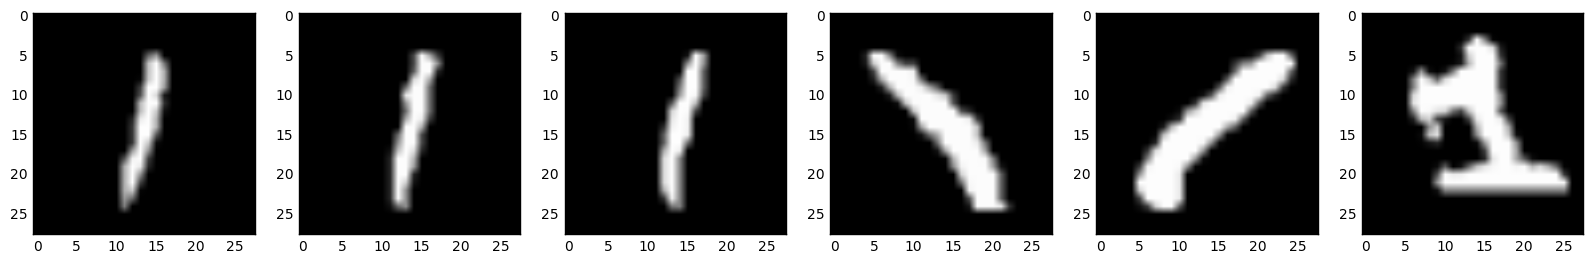

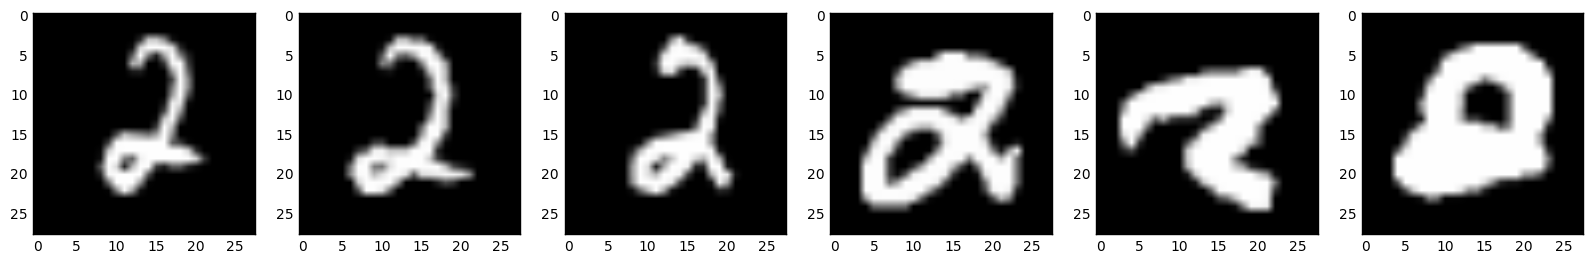

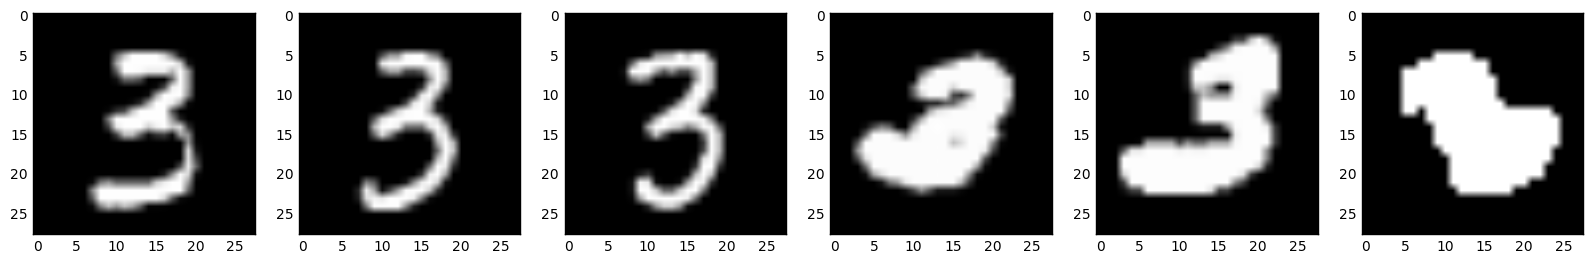

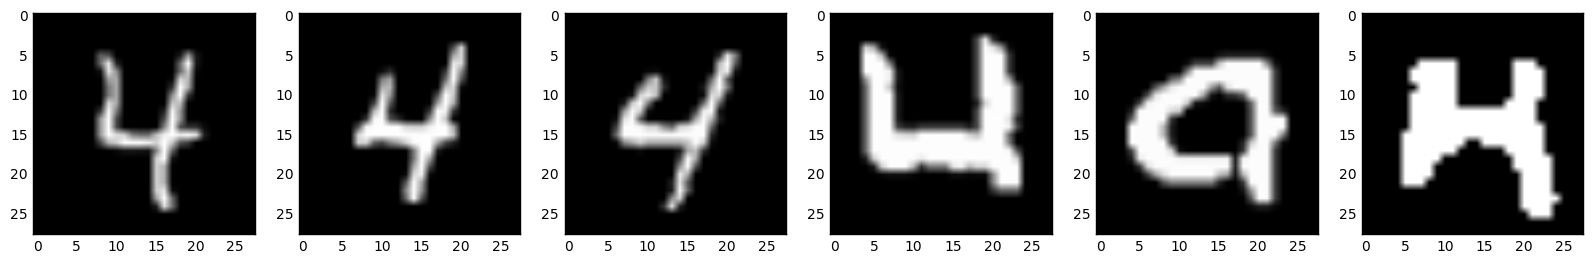

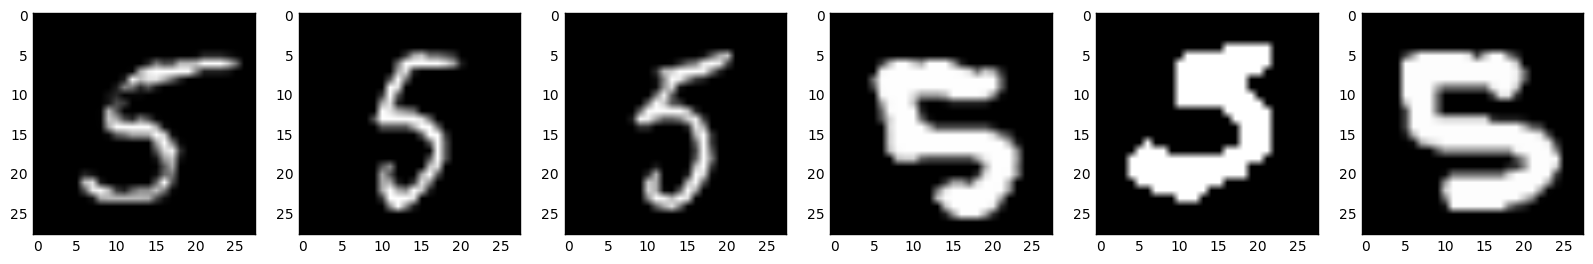

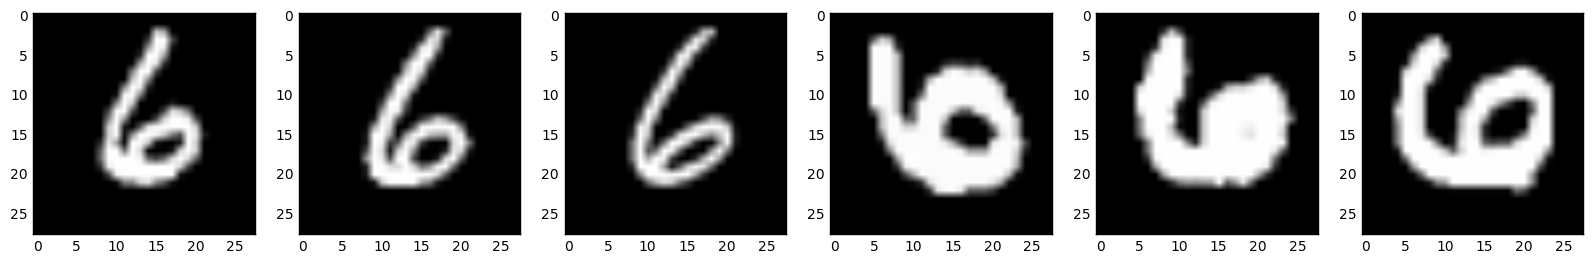

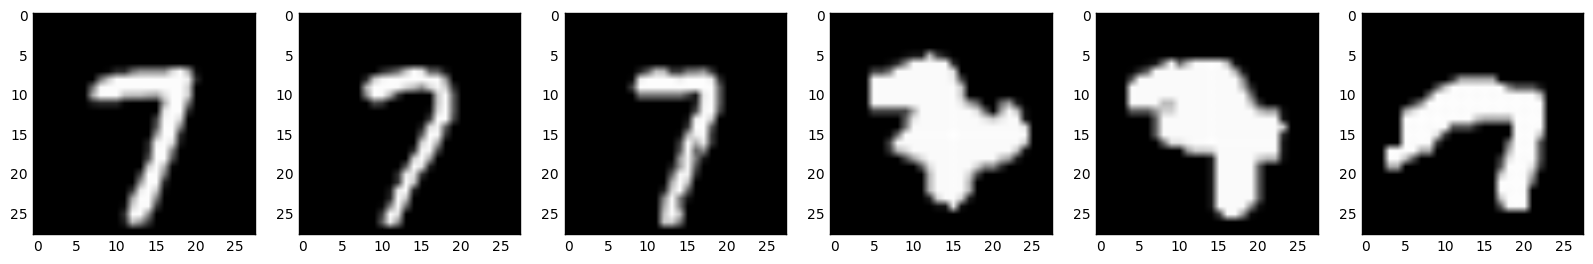

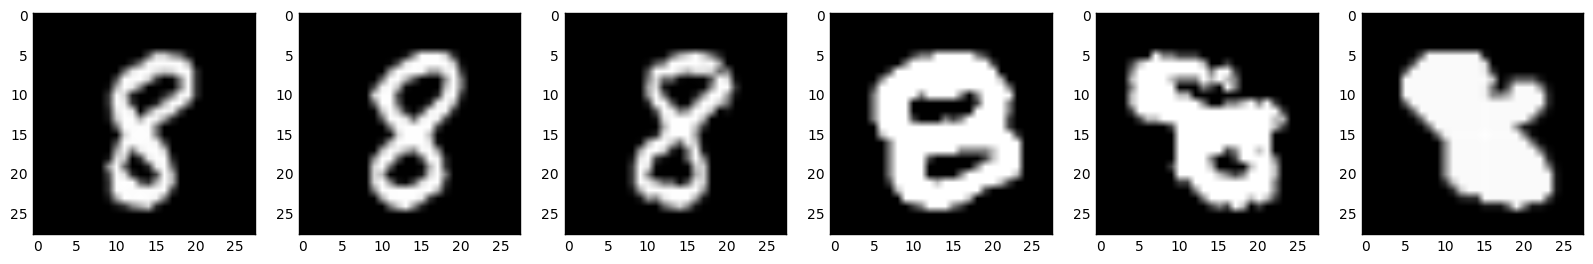

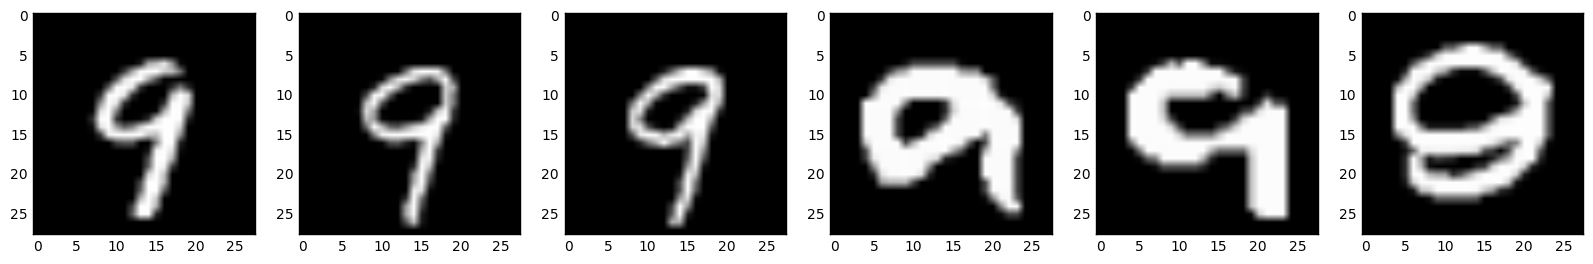

In [14]:
# повторите предыдущий пункт для каждой из цифр
# Прокомментируйте 
print("Для каждой цифры имеем: ")
k = 0
for i in range(10):
    far_ids, near_ids = find_imgs(averege[i], i)
    res = [[] for i in range(6)]
    
    for j in range(3):
        res[j] = np.reshape(train_data[near_ids[j]], (28, 28))
        
    for j in range(3): 
        res[j + 3] = np.reshape(train_data[far_ids[j]], (28, 28))
    
    plt.figure(figsize=(20, 10))
    for j in range(6):
        plt.subplot(2, 6, j + 1)
        plt.imshow(res[j], cmap="gray")
        

Каждая строка соответсвтует цифре, первые три изображения отвечают за 3 самых близких изображения к среднему по данной цифре, а последние три - за 3 самых дальних относительно среднего изображения по той же цифре. Общая особенность прослеживается в том, что цифры, написанные более жирным шрифтом, дальше от среднего, а цифры, написанные более тонким ширфтом, - ближе.

In [36]:
# разбейте выборку на две псевдослучайные подвыборки повторяемым образом (70:30)


Разобьем выборку на обучающую и тестирующую подвыборки с помощью специальной функции из библиотеки sklearn.

Выведем размеры первой и второй и убедимся, что соотношение 70:30(обучающая:тестирующая) выполняется.

In [35]:
import sklearn
from sklearn.cross_validation import train_test_split
train, test = sklearn.cross_validation.train_test_split(train_data, test_size = 0.3, train_size = 0.7,
                                                        random_state = 13)
print(len(train_data), " - размер всех данных")
print(len(train), " - ", len(train)/len(train_data), "от всех данных")
print(len(test), " - ",  len(test)/len(train_data), " от всех данных")


42000  - размер всех данных
29399  -  0.6999761904761905 от всех данных
12600  -  0.3  от всех данных


In [ ]:
# Какая еще информация о данных кажется Вам важной?


В ходе выполнения задания было полученно предсатвление о типах данных, с которыми необходимо работать. Немаловажную роль играют алгоритмы работы с этими данными, ведь данных много и хочется за наиболее меньшее время уметь их обрабатывать. 